## Feature Engineering
In this notebook, I transform raw price data into meaningful features for modeling.<br>
I will use these features to predict the direction of next-day returns for each asset in the future.

In [1]:
import os
import sys
import pandas as pd
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
from src.features import compute_moving_average, compute_volatility, compute_momentum, compute_rsi

tickers = ["AAPL", "NVDA", "VOO", "JPM", "GLD", "BTC-USD", "PFE"]

In [ ]:
os.makedirs("data/features", exist_ok=True)

for ticker in tickers:
    print(f"Processing features for {ticker}...")
    
    df = pd.read_csv(f"data/raw/{ticker}.csv", index_col="Date", parse_dates=True)
    close = pd.to_numeric(df["Close"], errors="coerce")

    features = pd.DataFrame(index=close.index)
    features["Close"] = close
    features["MA_10"] = compute_moving_average(close, 10)
    features["Volatility_10"] = compute_volatility(close, 10)
    features["Momentum_5"] = compute_momentum(close, 5)
    features["RSI_14"] = compute_rsi(close, 14)

    # Drop rows with NaN (caused by rolling windows)
    features = features.dropna()

    # Save to processed
    features.to_csv(f"data/features/{ticker}_features.csv")

### Features Created
Here are the features I have created:
#### Moving Average
- Smooths short-term fluctuations
#### Volatility
- Measures SD of returns
#### Momentum
- Captures recent price movement
#### Relative Strength Index(RSI)
- Indicates overbought/oversold conditions

<Axes: title={'center': 'AAPL Close vs Moving Average'}, xlabel='Date'>

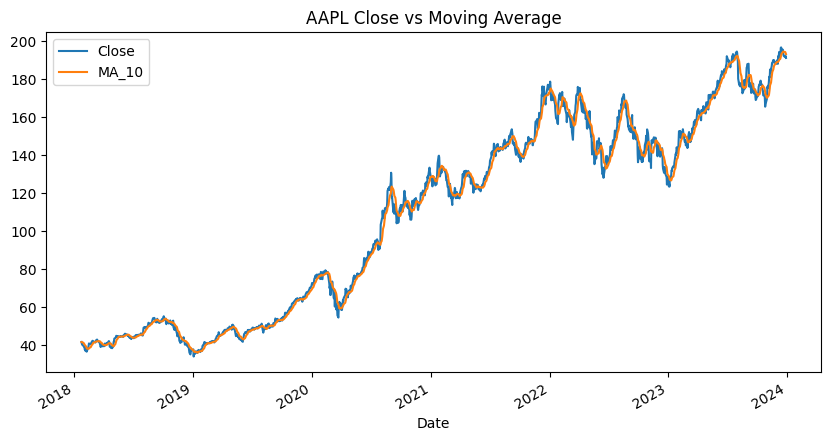

In [2]:
features = pd.read_csv("data/features/AAPL_features.csv", index_col="Date", parse_dates=True)

features[["Close", "MA_10"]].plot(figsize=(10, 5), title="AAPL Close vs Moving Average")

<Axes: title={'center': 'AAPL 10-Day Volatility'}, xlabel='Date'>

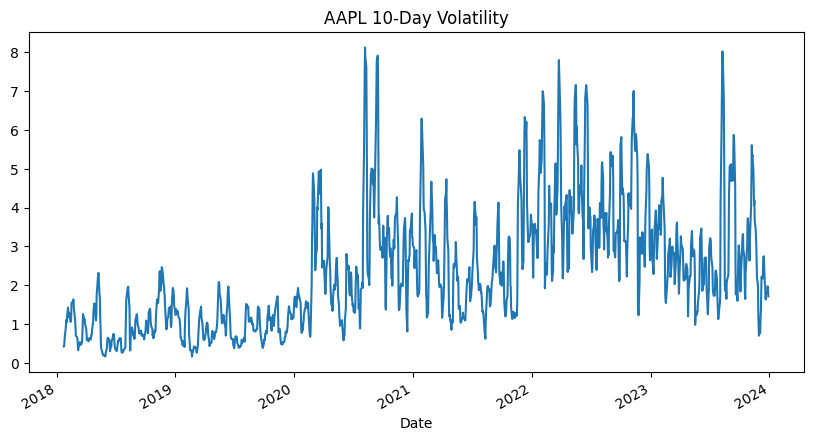

In [3]:
features["Volatility_10"].plot(figsize=(10, 5), title="AAPL 10-Day Volatility")

<Axes: title={'center': 'AAPL RSI'}, xlabel='Date'>

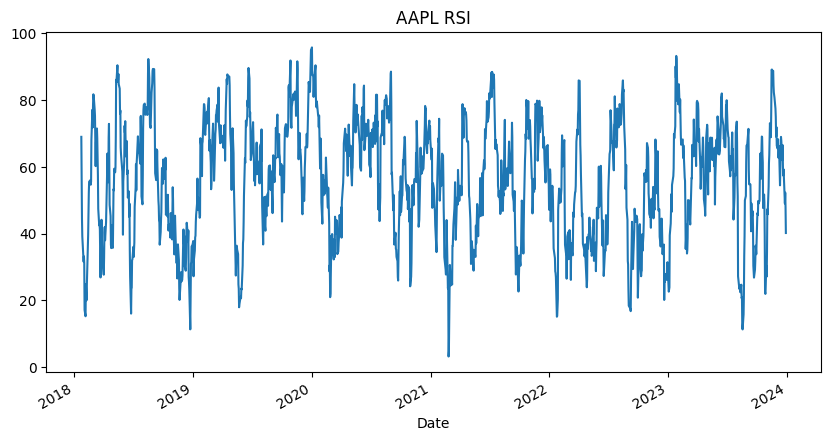

In [4]:
features["RSI_14"].plot(figsize=(10, 5), title="AAPL RSI")